# 0. 주제 

Reddit api를 통한 해외주식 분석

# 1. 목적

특정 종목과 관련된 트렌드 단어를 분석 후

종목 분석내의 포함되어 있는 긍정어와 부정어 비율 분석을 통해 주식 가격의 상승및 하락 추세를 예측 한다



In [1]:
import praw # imports praw for reddit access
import pandas as pd # imports pandas for data manipulation
import datetime as dt # imports datetime to deal with dates
reddit = praw.Reddit(client_id='Fr6oljX7QOBRCUspR2IqSg', 
                     client_secret='0H_AEaXyJ2sZ--B7sk4haGIaZX8uTQ', 
                     user_agent='Your_api_name', 
                     username='no-Shame-4595', 
                     password='rnjsaltjq12@@')
subreddit = reddit.subreddit('wallstreetbets')
title = 'tesla'
DD_subreddit = subreddit.search(f'flair:"DD" title:{title}', limit=100,sort='new')
DD_dict = { "title":[],
            "score":[],
            "id":[],
            "url":[],
            "comms_num": [], 
            "date": [],
            "body":[]}
for posts in DD_subreddit:
    DD_dict["title"].append(posts.title)
    DD_dict["score"].append(posts.score)
    DD_dict["id"].append(posts.id)
    DD_dict["url"].append(posts.url)
    DD_dict["comms_num"].append(posts.num_comments)
    DD_dict["date"].append(posts.created)
    DD_dict["body"].append(posts.selftext)
# First convert dictionary to DataFrame
DD_data = pd.DataFrame(DD_dict)
# Function takes a variable type numeric and converts to date
def get_date(date):
    return dt.datetime.fromtimestamp(date)
# We run this function and save the result in a new object
_date = DD_data["date"].apply(get_date)
DD_data


,title,score,id,url,comms_num,date,body
0,Tesla Stock Split Conspiracy Theory,1204,qyoqoo,https://www.reddit.com/r/wallstreetbets/commen...,418,1.637475e+09,"I don’t normally do threads like this, but I’m..."
1,Tesla is back at it with tons of calls flow. A...,78,qrn4fc,https://www.reddit.com/r/wallstreetbets/commen...,25,1.636643e+09,"For almost a month, Tesla has been dominating ..."
2,Tesla Profit EXPLOSION in Q4 '22,13,qpkaas,https://www.reddit.com/r/wallstreetbets/commen...,23,1.636397e+09,Teaser: Gross margins could be 40+% and Q4 ope...
3,How much does Tesla need to earn in order to j...,652,qmjfa8,https://www.reddit.com/r/wallstreetbets/commen...,526,1.636029e+09,https://imgur.com/gallery/keCnGJU\n\nTL;DR: Te...
4,Tendytards fuck your Tesla money here is the w...,59,qje7e7,https://www.reddit.com/r/wallstreetbets/commen...,67,1.635640e+09,Every EV will need this battery!!!\n\nQuantum ...
...,...,...,...,...,...,...,...
95,Why Tesla is undervalued - DD: Mercedes admits...,20,9d5qw7,https://www.reddit.com/r/wallstreetbets/commen...,29,1.536148e+09,[https://www.bloomberg.com/news/articles/2018-...
96,Long $TSLA - Tesla filed a patent for automati...,20,9bq9sz,http://appft.uspto.gov/netacgi/nph-Parser?Sect...,6,1.535687e+09,
97,Bull vs. Bear: Is Tesla Stock a Boom or a Bust...,0,955dfu,https://cheddar.com/videos/bull-vs-bear-is-tes...,4,1.533591e+09,
98,TESLA CATALYST DD,9,91lnfp,https://www.reddit.com/r/wallstreetbets/commen...,2,1.532468e+09,Elon is supposed to go on the Joel Rogaine Exp...


In [2]:
import nltk
import pickle
from nltk.corpus import stopwords
import re

##정규표현식을 통한 문자열 치환
def clean_text(inputString):
  text_rmv = re.sub('[-=+,#/\?%;:^.@*\"※~ㆍ!』‘|\(\)\[\]`\'…》\”\“\’·]', ' ', inputString)
  return text_rmv
##nltk 라이브러리를 통한 문자 토큰화
DD_data['body']=DD_data['body'].str.lower()
T_data=DD_data.body.apply(clean_text).apply(nltk.word_tokenize)
T_data


0     [i, don, t, normally, do, threads, like, this,...
1     [for, almost, a, month, tesla, has, been, domi...
2     [teaser, gross, margins, could, be, 40, and, q...
3     [https, imgur, com, gallery, kecngju, tl, dr, ...
4     [every, ev, will, need, this, battery, quantum...
                            ...                        
95    [https, www, bloomberg, com, news, articles, 2...
96                                                   []
97                                                   []
98    [elon, is, supposed, to, go, on, the, joel, ro...
99    [https, thestockboys, com, 2018, 07, 23, tesla...
Name: body, Length: 100, dtype: object

In [3]:
##nltk pos_tag 함수를 사용하여 품사 태깅
Taged_data= T_data.apply(nltk.pos_tag)
Taged_data

0     [(i, JJ), (don, VBP), (t, NNS), (normally, RB)...
1     [(for, IN), (almost, RB), (a, DT), (month, NN)...
2     [(teaser, NN), (gross, JJ), (margins, NNS), (c...
3     [(https, NN), (imgur, NN), (com, NN), (gallery...
4     [(every, DT), (ev, NN), (will, MD), (need, VB)...
                            ...                        
95    [(https, NN), (www, NN), (bloomberg, NN), (com...
96                                                   []
97                                                   []
98    [(elon, NN), (is, VBZ), (supposed, VBN), (to, ...
99    [(https, NN), (thestockboys, VBZ), (com, JJ), ...
Name: body, Length: 100, dtype: object

In [27]:
dash = pd.DataFrame(Taged_data)
dash.to_csv('dash.csv',mode='w')

In [4]:
t_list =[]
for i in Taged_data : 
    t_list.append(i)
t_list = sum(t_list, [])
t_list

[('i', 'JJ'),
 ('don', 'VBP'),
 ('t', 'NNS'),
 ('normally', 'RB'),
 ('do', 'VBP'),
 ('threads', 'NNS'),
 ('like', 'VB'),
 ('this', 'DT'),
 ('but', 'CC'),
 ('i', 'VBZ'),
 ('m', 'VBP'),
 ('a', 'DT'),
 ('big', 'JJ'),
 ('supporter', 'NN'),
 ('of', 'IN'),
 ('elon', 'NN'),
 ('musk', 'NN'),
 ('and', 'CC'),
 ('i', 'NN'),
 ('follow', 'VBP'),
 ('$', '$'),
 ('tsla', 'NN'),
 ('https', 'NN'),
 ('mobile', 'JJ'),
 ('twitter', 'NN'),
 ('com', 'NN'),
 ('search', 'NN'),
 ('q', 'NN'),
 ('24tsla', 'CD'),
 ('&', 'CC'),
 ('src', 'JJ'),
 ('cashtag_click', 'NN'),
 ('stock', 'NN'),
 ('closely', 'RB'),
 ('this', 'DT'),
 ('is', 'VBZ'),
 ('going', 'VBG'),
 ('to', 'TO'),
 ('be', 'VB'),
 ('a', 'DT'),
 ('nerdy', 'JJ'),
 ('conspiracy', 'NN'),
 ('theory', 'NN'),
 ('type', 'NN'),
 ('thread', 'NN'),
 ('on', 'IN'),
 ('tesla', 'NNS'),
 ('based', 'VBN'),
 ('on', 'IN'),
 ('some', 'DT'),
 ('recent', 'JJ'),
 ('hints', 'NNS'),
 ('from', 'IN'),
 ('elon', 'NN'),
 ('himself', 'PRP'),
 ('take', 'VBP'),
 ('it', 'PRP'),
 ('for', 'IN

In [5]:
##명사만 추출
NN_words = []
for word, pos in t_list:
    if 'NN' in pos:
        NN_words.append(word)

In [6]:
##Lemmatization 원형 찾기
wlem = nltk.WordNetLemmatizer()
lemmatized_words = []
for word in NN_words:
    new_word = wlem.lemmatize(word)
    lemmatized_words.append(new_word)

In [7]:
stopwords_list = stopwords.words('english') #nltk에서 제공하는 불용어사전 이용
#print('stopwords: ', stopwords_list)
unique_NN_words = set(lemmatized_words)
final_NN_words = lemmatized_words

# 불용어 제거
for word in unique_NN_words:
    if word in stopwords_list:
        while word in final_NN_words: final_NN_words.remove(word)
customized_stopwords = ['http', 'png', 'jpg', "company", "com",'www','stock','price',title] # 직접 만든 불용어 사전

unique_NN_words1 = set(final_NN_words)
for word in unique_NN_words1:
    if word in customized_stopwords:
        while word in final_NN_words: final_NN_words.remove(word)


[('year', 177), ('car', 163), ('share', 138), ('vehicle', 131), ('market', 122), ('battery', 109), ('tsla', 87), ('time', 81), ('ev', 76), ('revenue', 74), ('model', 71), ('note', 66), ('data', 64), ('auto', 62), ('news', 62), ('elon', 57), ('cost', 57), ('x200b', 56), ('people', 56), ('earnings', 54)]


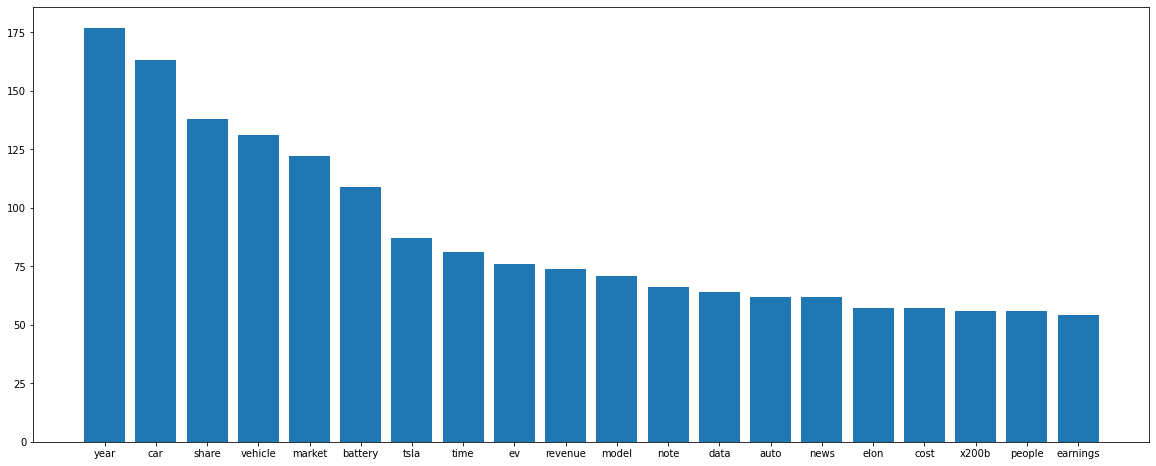

In [58]:
from collections import Counter
c = Counter(final_NN_words) # input type should be a list of words (or tokens)
k = 20
print(c.most_common(k)) # 빈도수 기준 상위 k개 단어 출력
import matplotlib.pyplot as plt
testl=c.most_common(20)
x_val = [x[0] for x in testl]
y_val = [x[1] for x in testl]
plt.figure(figsize=(20,8))
plt.bar(x_val,y_val)
plt.show()

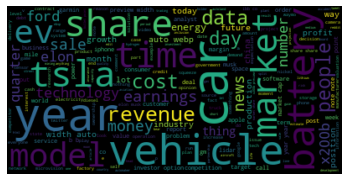

In [18]:
import wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from os import path
noun_text = ''
for word in final_NN_words:
    noun_text = noun_text +' '+word
import matplotlib.pyplot as plt
import io
import urllib, base64
wordcloud = WordCloud(max_font_size=60, relative_scaling=.5).generate(noun_text) # generate() 는 하나의 string value를 입력 받음
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
DB_FILENAME = f'{title}.png'
DB_FILEPATH = os.path.join(os.getcwd(), DB_FILENAME)
plt.savefig(DB_FILEPATH)


In [65]:
from apscheduler.schedulers.blocking import BlockingScheduler
import time
import atexit
def add_DD():
    reddit = praw.Reddit(client_id='Fr6oljX7QOBRCUspR2IqSg', 
                        client_secret='0H_AEaXyJ2sZ--B7sk4haGIaZX8uTQ', 
                        user_agent='Your_api_name', 
                        username='no-Shame-4595', 
                        password='rnjsaltjq12@@')
    subreddit = reddit.subreddit('wallstreetbets')
    DD_subreddit = subreddit.search(f'flair:"DD"', limit=1000,sort='new')
    DD_dict = { "title":[],
                "score":[],
                "id":[],
                "url":[],
                "comms_num": [], 
                "date": [],
                "body":[]}
    for posts in DD_subreddit:
        DD_dict["title"].append(posts.title)
        DD_dict["score"].append(posts.score)
        DD_dict["id"].append(posts.id)
        DD_dict["url"].append(posts.url)
        DD_dict["comms_num"].append(posts.num_comments)
        DD_dict["date"].append(posts.created)
        DD_dict["body"].append(posts.selftext)
    # First convert dictionary to DataFrame
    DD_data = pd.DataFrame(DD_dict)
    # Function takes a variable type numeric and converts to date
    def get_date(date):
        return dt.datetime.fromtimestamp(date)
    # We run this function and save the result in a new object
    _date = DD_data["date"].apply(get_date)
    # We replace the previous date variable with the new date variableDD_data = DD_data.assign(date = _date)
    # Let's check the output table
    DB_FILENAME = 'DB_API.db'
    DB_FILEPATH = os.path.join(os.getcwd(), DB_FILENAME)
    conn = sqlite3.connect(DB_FILENAME)
    cur = conn.cursor()
    #테이블 존재시 중복되지 않는 데이터 추가 기능 필요 ->replace로 우회
    DD_data.to_sql('DD',conn,if_exists='replace')
    conn.commit()

from apscheduler.schedulers.background import BackgroundScheduler
scheduler = BackgroundScheduler()
## 24시간 마다 DD 데이터 ㅅ수집
scheduler.add_job(func=add_DD, trigger="interval", days=1) 
scheduler.start()

C:\Users\mesho\anaconda3\lib\site-packages\apscheduler\util.py:95: PytzUsageWarning: The zone attribute is specific to pytz's interface; please migrate to a new time zone provider. For more details on how to do so, see https://pytz-deprecation-shim.readthedocs.io/en/latest/migration.html
  if obj.zone == 'local':
C:\Users\mesho\anaconda3\lib\site-packages\apscheduler\triggers\interval.py:66: PytzUsageWarning: The normalize method is no longer necessary, as this time zone supports the fold attribute (PEP 495). For more details on migrating to a PEP 495-compliant implementation, see https://pytz-deprecation-shim.readthedocs.io/en/latest/migration.html
  return self.timezone.normalize(next_fire_time)
